In [1]:
import pandas as pd


Data used for this tutorial:

<b> Titanic data</b>

<!-- This tutorial uses the Titanic data set, stored as CSV. The data consists of the following data columns:

* PassengerId: Id of every passenger.
* Survived: This feature have value 0 and 1. 0 for not survived and 1 for survived.
* Pclass: There are 3 classes: Class 1, Class 2 and Class 3.
* Name: Name of passenger.
* Sex: Gender of passenger.
* Age: Age of passenger.
* SibSp: Indication that passenger have siblings and spouse.
* Parch: Whether a passenger is alone or have family.
* Ticket: Ticket number of passenger.
* Fare: Indicating the fare.
* Cabin: The cabin of passenger.
* Embarked: The embarked category.

To raw data : https://github.com/pandas-dev/pandas/tree/master/doc/data

--->

In [2]:
titanic = pd.read_csv("data/titanic.csv")

In [3]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<b> Air quality data</b>

<!-- 

This tutorial uses air quality data about NO2 and Particulate matter less than 2.5 micrometers, made available by openaq and using the py-openaq package. The air_quality_long.csv data set provides NO2 and PM25

values for the measurement stations FR04014, BETR801 and London Westminster in respectively Paris, Antwerp and London.

The air-quality data set has the following columns:
* city: city where the sensor is used, either Paris, Antwerp or London
* country: country where the sensor is used, either FR, BE or GB
* location: the id of the sensor, either FR04014, BETR801 or London Westminster
* parameter: the parameter measured by the sensor, either NO2 or Particulate matter
* value: the measured value
* unit: the unit of the measured parameter, in this case ‘µg/m³’
and the index of the DataFrame is datetime, the datetime of the measurement.

Note

The air-quality data is provided in a so-called long format data representation with each observation on a separate row and each variable a separate column of the data table. The long/narrow format is also known as the tidy data format.

To raw data : https://github.com/pandas-dev/pandas/blob/master/doc/data/air_quality_long.csv

--->

In [4]:
air_quality = pd.read_csv(
    "data/air_quality_long.csv", index_col="date.utc", parse_dates=True
)

In [5]:
air_quality.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-18 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.0,µg/m³
2019-06-17 08:00:00+00:00,Antwerpen,BE,BETR801,pm25,6.5,µg/m³
2019-06-17 07:00:00+00:00,Antwerpen,BE,BETR801,pm25,18.5,µg/m³
2019-06-17 06:00:00+00:00,Antwerpen,BE,BETR801,pm25,16.0,µg/m³
2019-06-17 05:00:00+00:00,Antwerpen,BE,BETR801,pm25,7.5,µg/m³


# How to reshape the layout of tables?

## Sort table rows

I want to sort the Titanic data according to the age of the passengers.

In [6]:
titanic.sort_values(by="Age").head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
803,804,1,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,2625,8.5167,NaN,C
755,756,1,2,"Hamalainen, Master. Viljo",male,0.67,1,1,250649,14.5000,NaN,S
644,645,1,3,"Baclini, Miss. Eugenie",female,0.75,2,1,2666,19.2583,NaN,C
469,470,1,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,2666,19.2583,NaN,C
78,79,1,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,248738,29.0000,NaN,S


I want to sort the Titanic data according to the cabin class and age in descending order.

In [7]:
titanic.sort_values(by=['Pclass', 'Age'], ascending=False).head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
851,852,0,3,"Svensson, Mr. Johan",male,74.0,0,0,347060,7.7750,NaN,S
116,117,0,3,"Connors, Mr. Patrick",male,70.5,0,0,370369,7.7500,NaN,Q
280,281,0,3,"Duane, Mr. Frank",male,65.0,0,0,336439,7.7500,NaN,Q
483,484,1,3,"Turkula, Mrs. (Hedwig)",female,63.0,0,0,4134,9.5875,NaN,S
326,327,0,3,"Nysveen, Mr. Johan Hansen",male,61.0,0,0,345364,6.2375,NaN,S


With Series.sort_values(), the rows in the table are sorted according to the defined column(s). The index will follow the row order.

# Long to wide table format

Let's use a small subset of the air quality data set. We focus on NO2 data and only use the first two measurements of each location (i.e. the head of each group). The subset of data will be called no2_subset.

In [8]:
# Filter for no2 data only
no2 = air_quality[air_quality["parameter"] == "no2"]

In [9]:
# use 2 measurements (head) for each location (groupby)
no2_subset = no2.sort_index().groupby(["location"]).head(2)

In [10]:
no2_subset

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-04-09 01:00:00+00:00,Antwerpen,BE,BETR801,no2,22.5,µg/m³
2019-04-09 01:00:00+00:00,Paris,FR,FR04014,no2,24.4,µg/m³
2019-04-09 02:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³
2019-04-09 02:00:00+00:00,Antwerpen,BE,BETR801,no2,53.5,µg/m³
2019-04-09 02:00:00+00:00,Paris,FR,FR04014,no2,27.4,µg/m³
2019-04-09 03:00:00+00:00,London,GB,London Westminster,no2,67.0,µg/m³



https://pandas.pydata.org/docs/_images/07_pivot.svg

I want the values for the three stations as separate columns next to each other

In [11]:
no2_subset.pivot(columns="location", values="value")

location,BETR801,FR04014,London Westminster
date.utc,,,
2019-04-09 01:00:00+00:00,22.5,24.4,NaN
2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2019-04-09 03:00:00+00:00,NaN,NaN,67.0


The pivot() function is purely reshaping of the data: a single value for each index/column combination is required.

As pandas support plotting of multiple columns (see plotting tutorial) out of the box, the conversion from long to wide table format enables the plotting of the different time series at the same time:

In [12]:
no2.head()

,city,country,location,parameter,value,unit
date.utc,,,,,,
2019-06-21 00:00:00+00:00,Paris,FR,FR04014,no2,20.0,µg/m³
2019-06-20 23:00:00+00:00,Paris,FR,FR04014,no2,21.8,µg/m³
2019-06-20 22:00:00+00:00,Paris,FR,FR04014,no2,26.5,µg/m³
2019-06-20 21:00:00+00:00,Paris,FR,FR04014,no2,24.9,µg/m³
2019-06-20 20:00:00+00:00,Paris,FR,FR04014,no2,21.4,µg/m³


<AxesSubplot:xlabel='date.utc'>

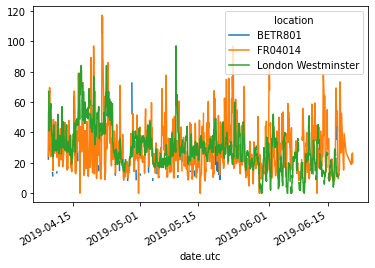

In [13]:
no2.pivot(columns="location", values="value").plot()

## **Note**
When the index parameter is not defined, the existing index (row labels) is used.

# Pivot table


https://pandas.pydata.org/docs/_images/07_pivot_table.svg

I want the mean concentrations for NO2 and PM2.5 in each of the stations in table form

In [14]:
air_quality.pivot_table(
    values="value", index="location", columns="parameter", aggfunc="mean"
)

parameter,no2,pm25
location,,
BETR801,26.950920,23.169492
FR04014,29.374284,NaN
London Westminster,29.740050,13.443568


In the case of pivot(), the data is only rearranged. When multiple values need to be aggregated (in this specific case, the values on different time steps) pivot_table() can be used, providing an aggregation function (e.g. mean) on how to combine these values.

Pivot table is a well known concept in spreadsheet software. When interested in summary columns for each variable separately as well, put the margin parameter to True:

In [15]:
air_quality.pivot_table(
    values="value",
    index="location",
    columns="parameter",
    aggfunc="mean",
    margins=True,
)

parameter,no2,pm25,All
location,,,
BETR801,26.950920,23.169492,24.982353
FR04014,29.374284,NaN,29.374284
London Westminster,29.740050,13.443568,21.491708
All,29.430316,14.386849,24.222743


## **Note**

In case you are wondering, pivot_table() is indeed directly linked to groupby(). The same result can be derived by grouping on both parameter and location:

air_quality.groupby(["parameter", "location"]).mean()


# Wide to long format

Starting again from the wide format table created in the previous section:

In [16]:
no2_pivoted = no2.pivot(columns="location", values="value").reset_index()

In [17]:
no2_pivoted.head()

location,date.utc,BETR801,FR04014,London Westminster
0,2019-04-09 01:00:00+00:00,22.5,24.4,NaN
1,2019-04-09 02:00:00+00:00,53.5,27.4,67.0
2,2019-04-09 03:00:00+00:00,54.5,34.2,67.0
3,2019-04-09 04:00:00+00:00,34.5,48.5,41.0
4,2019-04-09 05:00:00+00:00,46.5,59.5,41.0



https://pandas.pydata.org/docs/_images/07_melt.svg

I want to collect all air quality NO2 measurements in a single column (long format)

In [18]:
no_2 = no2_pivoted.melt(id_vars="date.utc")

In [19]:
no_2.head()

,date.utc,location,value
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The pandas.melt() method on a DataFrame converts the data table from wide format to long format. The column headers become the variable names in a newly created column.

The solution is the short version on how to apply pandas.melt(). The method will melt all columns NOT mentioned in id_vars together into two columns: A column with the column header names and a column with the values itself. The latter column gets by default the name value.

The pandas.melt() method can be defined in more detail:

In [20]:
no_2 = no2_pivoted.melt(
    id_vars="date.utc",
    value_vars=["BETR801", "FR04014", "London Westminster"],
    value_name="NO_2",
    var_name="id_location",
)

In [21]:
no_2.head()

,date.utc,id_location,NO_2
0,2019-04-09 01:00:00+00:00,BETR801,22.5
1,2019-04-09 02:00:00+00:00,BETR801,53.5
2,2019-04-09 03:00:00+00:00,BETR801,54.5
3,2019-04-09 04:00:00+00:00,BETR801,34.5
4,2019-04-09 05:00:00+00:00,BETR801,46.5


The result in the same, but in more detail defined:
* value_vars defines explicitly which columns to melt together
* value_name provides a custom column name for the values column instead of the default column name value
* var_name provides a custom column name for the column collecting the column header names. Otherwise it takes the index name or a default variable

Hence, the arguments value_name and var_name are just user-defined names for the two generated columns. The columns to melt are defined by id_vars and value_vars.